In [8]:
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


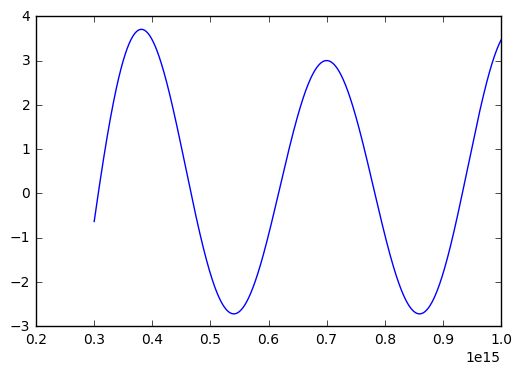

In [12]:
lambd = np.linspace(300,1000,10000)*10**(-9)
v = 3*10**8/lambd[::-1]
T = np.max(v)-np.min(v)
N = 5
fn = np.array(range(N))+1
F = fn[0]
for n in range(1,N):
    F = F + fn[n]*np.cos(v*n*np.pi/T)
plt.figure()
plt.plot(v,F)

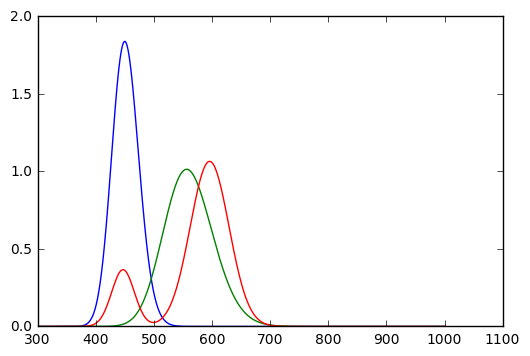

In [31]:
#If this accurate could exactly compute integrals
x = 1.065*np.exp(-0.5*((lambd*10**9-595.8)/33.33)**2) + 0.366*np.exp(-0.5*((lambd*10**9-446.8)/19.44)**2)
y = 1.014*np.exp(-0.5*((np.log(lambd*10**9)-np.log(556.3))/0.075)**2)
z = 1.839*np.exp(-0.5*((np.log(lambd*10**9)-np.log(449.8))/0.051)**2)

#x = np.random.rand(len(lambd))
#y = np.random.rand(len(lambd))
#z = np.random.rand(len(lambd))

plt.figure()
plt.plot(lambd*10**9,z)
plt.plot(lambd*10**9,y)
plt.plot(lambd*10**9,x)

In [30]:
from scipy.optimize import nnls


K = 10
theta = np.pi*np.array(range(K))/(4*K)
ctheta = np.cos(theta)

#print theta
#print ctheta

#measurements
X=np.zeros(3*K)
for k in range(0,K):
    X[3*k+0] = np.sum(np.interp(v*ctheta[k], v, x)*F)
    X[3*k+1] = np.sum(np.interp(v*ctheta[k], v, y)*F)
    X[3*k+2] = np.sum(np.interp(v*ctheta[k], v, z)*F)

#noise    
X = X + 0.1*np.random.randn(len(X))

S = np.zeros([3*K,N])
for k in range(K):
    for n in range(N):
        S[3*k+0,n] = np.sum(np.interp(v*ctheta[k], v, x)*np.cos(n*v*np.pi/T))
        S[3*k+1,n] = np.sum(np.interp(v*ctheta[k], v, y)*np.cos(n*v*np.pi/T))
        S[3*k+2,n] = np.sum(np.interp(v*ctheta[k], v, z)*np.cos(n*v*np.pi/T))

print np.linalg.cond(S)
#print S
#print X
#print S.dot(np.array([1,2]))

print('Solutions (LS, np.LS, NNLS + reg):')

print np.linalg.inv(S.transpose().dot(S)).dot(S.transpose().dot(X))
print np.linalg.lstsq(S, X)[0]


#NNLS with Tikhonov regularization
lam = 10E1

#L2 regularization
D = np.eye(N)

#Smoothness: difference operator
D = 2*np.eye(N) - np.eye(N, k=1) - np.eye(N, k=-1)

A = np.concatenate((S, lam*D) )
b = np.concatenate((X, np.zeros(N) ))
print nnls(A, b)[0]

print('condition number of A:')
print(np.linalg.cond(A))

U, s, V = np.linalg.svd(S, full_matrices=True)
print S.shape
print s
print('condition number of S:')
print s[0]/s[-1]

11199.9897267
Solutions (LS, np.LS, NNLS + reg):
[ 1.00942996  2.01716219  3.01070289  4.00634594  5.0011072 ]
[ 1.00942996  2.01716218  3.01070288  4.00634594  5.0011072 ]
[ 0.92746133  1.98057787  2.17450687  3.91248377  4.1345581 ]
condition number of A:
643.297147044
(30, 5)
[  3.34659315e+04   2.93433287e+03   3.88055372e+02   7.76862874e+01
   2.98803234e+00]
condition number of S:
11199.9897267


In [ ]:
for k in range(K):
    for n in range(N):
        plt.figure()
        plt.plot(v,np.cos(n*v*np.pi/T))
        plt.plot(v,np.interp(v*ctheta[k], v, x))

In [ ]:
print S

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the images.
orig_img = Image.open("data/lena512.png")
corr_img = Image.open("data/lena512_corrupted.png")


# Convert to arrays.
Uorig = np.array(orig_img)
Ucorr = np.array(corr_img)
rows, cols = Uorig.shape

# Known is 1 if the pixel is known,
# 0 if the pixel was corrupted.
Known = np.zeros((rows, cols))
for i in xrange(rows):
    for j in xrange(cols):
         if Uorig[i, j] == Ucorr[i, j]:
            Known[i, j] = 1

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img);
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img);
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [ ]:
# Recover the original image using total variation in-painting.
from cvxpy import *
U = Variable(rows, cols)
obj = Minimize(tv(U))
constraints = [mul_elemwise(Known, U) == mul_elemwise(Known, Ucorr)]
prob = Problem(obj, constraints)
# Use SCS to solve the problem.
prob.solve(verbose=True, solver=SCS)

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
# Display the in-painted image.
img_rec = Image.fromarray(U.value)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = Image.fromarray(10*np.abs(Uorig - U.value))
ax[1].imshow(img_diff);
ax[1].set_title("Difference Image")
ax[1].axis('off');

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
# Load the images.
orig_img = Image.open("data/lena512color.tiff")

# Convert to arrays.
Uorig = np.array(orig_img)
rows, cols, colors = Uorig.shape

# Known is 1 if the pixel is known,
# 0 if the pixel was corrupted.
# The Known matrix is initialized randomly.
Known = np.zeros((rows, cols, colors))
for i in xrange(rows):
    for j in xrange(cols):
        if np.random.random() > 0.7:
            for k in xrange(colors):
                Known[i, j, k] = 1
            
Ucorr = Known*Uorig
corr_img = Image.fromarray(np.uint8(Ucorr))

# Display the images.
%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img);
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img);
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [ ]:
# Recover the original image using total variation in-painting.
from cvxpy import *
variables = []
constraints = []
for i in xrange(colors):
    U = Variable(rows, cols)
    variables.append(U)
    constraints.append(mul_elemwise(Known[:, :, i], U) == mul_elemwise(Known[:, :, i], Ucorr[:, :, i]))

prob = Problem(Minimize(tv(*variables)), constraints)
prob.solve(verbose=False, solver=SCS)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Load variable values into a single array.
rec_arr = np.zeros((rows, cols, colors), dtype=np.uint8)
for i in xrange(colors):
    rec_arr[:, :, i] = variables[i].value

fig, ax = plt.subplots(1, 2,figsize=(10, 5))
# Display the in-painted image.
img_rec = Image.fromarray(rec_arr)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = Image.fromarray(np.abs(Uorig - rec_arr))
ax[1].imshow(img_diff);
ax[1].set_title("Difference Image")
ax[1].axis('off');